/home/jjiangan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training score 1.0


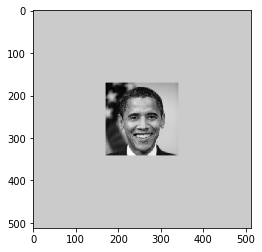

[2] is detected [1.48120964e-03 1.56959366e-03 9.91953521e-01 5.58385131e-06
 4.99009201e-03]


In [7]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import cv2
import matplotlib.pyplot as plt


def read_images_one(index):
    # read in images and reshape to (100, 100)
    image_name = 'picture/pic00' + str(index+1) + '.jpg'
    image = cv2.imread(image_name, 1)
    image = cv2.resize(image, (100,100))
    
    # make boarder
    image = cv2.copyMakeBorder(image,100,100,100,100,
                               cv2.BORDER_CONSTANT,
                               value=[200,200,200])
    image = cv2.resize(image, (512,512))
    
    # convert to gray and reshape
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    return image
    
    
def read_images():
    train = []
    label = []

    for i in range(5):
        # read in the image and reshape to 100,100
        image_name = 'picture/pic00' + str(i+1) + '.jpg'
        image = cv2.imread(image_name, 0)
        image = cv2.resize(image, (100, 100))
        
        # reshape the training data
        train.append(np.array(image).reshape(-1))
        label.append(i)
        
    train = np.vstack(train)
    label = np.vstack(label)

    return train, label


def regression(train, label):
    clf = LogisticRegression(random_state=0, solver='lbfgs',
                             multi_class='multinomial')
    
    # perform training 
    clf.fit(train, label)
    
    # perform testing
    print("training score", clf.score(train, label))
    
    return clf


def detection(clf, index):
    # read in a picture, padding and convert to gray scale
    image = read_images_one(index)
    plt.imshow(image, 'gray')
    plt.show()
        
    # sliding window detection  
    stepSize = 10
    windowSize = (100, 100)
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            slide_win = image[y:y + windowSize[1], x:x + windowSize[0]]          
            
            if slide_win.shape == (100,100):
                test_img = np.array(slide_win).reshape(1,10000)
                result = clf.predict(test_img)
                prob_all = clf.predict_proba(test_img)[0]
                
                
            if result!=-1 and prob_all[result]/sum(prob_all) > 0.99:
                print("{} is detected {}".format(result, prob_all))
        
    return result
                

if __name__=='__main__':
    train, label = read_images()
    clf = regression(train, label)
    detection(clf, 0)
    